# Police fatalities analysis

## 0. Introduction

Since Jan. 1, 2015, The Washington Post has been compiling a database of every fatal police shooting in the US (race, age, gender, armed status, mental-health indicators). There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. The purpose of this notebook is to analyze these datasets.


### Deaths_by_Police_US — Dataset overview

| Feature | Description |
|---------|-------------|
| id | Unique event identifier |
| name | Victim name |
| date | Date of incident |
| manner_of_death | How the person died |
| armed | Weapon carried / perceived |
| age | Victim age |
| gender | Victim gender |
| race | Race code |
| city | City of incident |
| state | State (postal code) |
| signs_of_mental_illness | Signs of mental illness present |
| threat_level | Reported threat level |
| flee | Whether victim was fleeing |
| body_camera | Body camera present |

**Dataset Summary:**  
- Number of features: 14  

### Median_Household_Income_2015 — Dataset overview

| Feature | Description |
|---------|-------------|
| Geographic Area | State code or state-level area |
| City | City / CDP / town name |
| Median Income | Median household income |

**Dataset Summary:**  
- Number of features: 3  

### Pct_Over_25_Completed_High_School — Dataset overview

| Feature | Description |
|---------|-------------|
| Geographic Area | State code or area label |
| City | City / CDP / town name |
| percent_completed_hs | Percent of population (age 25+) with high-school completion |

**Dataset Summary:**  
- Number of features: 3  

### Pct_People_Below_Poverty_Level — Dataset overview

| Feature | Description |
|---------|-------------|
| Geographic Area | State code or area label |
| City | City / CDP / town name |
| poverty_rate | Poverty rate (%) |

**Dataset Summary:**  
- Number of features: 3  

### Share_of_Race_By_City — Dataset overview

| Feature | Description |
|---------|-------------|
| Geographic area | State code or area label |
| City | City / CDP / town name |
| share_white | % white population |
| share_black | % black population |
| share_native_american | % native american population |
| share_asian | % asian population |
| share_hispanic | % hispanic population |

**Dataset Summary:**  
- Number of features: 7

**Datasets Summary:**  
- Sources: [The Washington Post](https://www.washingtonpost.com/), [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml)

## 1. Imports & Configuration

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pio.renderers.default = 'png'

## 2. Load Datasets

In [2]:
income_data = pd.read_csv('data/Median_Household_Income_2015.csv', encoding="windows-1252")
poverty_data = pd.read_csv('data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
completed_hs_pct = pd.read_csv('data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
share_race_city = pd.read_csv('data/Share_of_Race_By_City.csv', encoding="windows-1252")
fatalities_data = pd.read_csv('data/Deaths_by_Police_US.csv', encoding="windows-1252")
display(income_data.head())
display(poverty_data.head())
display(completed_hs_pct.head())
display(share_race_city.head())
display(fatalities_data.head())

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


## 3. Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [3]:
print('income_data:', income_data.shape)
print('poverty_data:', poverty_data.shape)
print('completed_hs_pct:', completed_hs_pct.shape)
print('share_race_city:', share_race_city.shape)
print('fatalities_data:', fatalities_data.shape)

print('\nColumns sample:')
print('income:', income_data.columns.tolist()[:10])
print('poverty:', poverty_data.columns.tolist()[:10])
print('hs:', completed_hs_pct.columns.tolist()[:10])
print('race:', share_race_city.columns.tolist()[:10])
print('fatalities:', fatalities_data.columns.tolist()[:20])

print('\nAny NaNs?')
print(income_data.isna().any().any(), poverty_data.isna().any().any(), completed_hs_pct.isna().any().any(), share_race_city.isna().any().any(), fatalities_data.isna().any().any())

print('\nDuplicates in fatalities_data:', fatalities_data.duplicated().any())

income_data: (29322, 3)
poverty_data: (29329, 3)
completed_hs_pct: (29329, 3)
share_race_city: (29268, 7)
fatalities_data: (2535, 14)

Columns sample:
income: ['Geographic Area', 'City', 'Median Income']
poverty: ['Geographic Area', 'City', 'poverty_rate']
hs: ['Geographic Area', 'City', 'percent_completed_hs']
race: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
fatalities: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']

Any NaNs?
True False False False True

Duplicates in fatalities_data: False


## 4. Cleaning & Type conversions

In [4]:
fatalities_data.fillna({
    'race': 'Unknown',
    'armed': 'Unknown',
    'gender': 'Unknown',
    'body_camera': 'Unknown',
    'signs_of_mental_illness': 'Unknown'
}, inplace=True)

income_data['Median Income'] = pd.to_numeric(income_data['Median Income'].replace('-', np.nan), errors='coerce')
poverty_data['poverty_rate'] = pd.to_numeric(poverty_data['poverty_rate'].replace('-', np.nan), errors='coerce')
completed_hs_pct['percent_completed_hs'] = pd.to_numeric(completed_hs_pct['percent_completed_hs'].replace('-', np.nan), errors='coerce')

race_cols = ['share_white','share_black','share_native_american','share_asian','share_hispanic']
share_race_city[race_cols] = share_race_city[race_cols].apply(pd.to_numeric, errors='coerce')

## 5. Descriptive statistics 

In [5]:
display(income_data.describe(include='all'))
display(poverty_data.describe())
display(completed_hs_pct.describe())
display(share_race_city[race_cols].describe())
display(fatalities_data.describe(include='all'))

,Geographic Area,City,Median Income
count,29322,29322,"27,385.00"
unique,51,24249,NaN
top,PA,Franklin city,NaN
freq,1762,16,NaN
mean,NaN,NaN,"51,177.89"
std,NaN,NaN,"24,887.32"
min,NaN,NaN,"4,511.00"
25%,NaN,NaN,"35,625.00"
50%,NaN,NaN,"45,305.00"
75%,NaN,NaN,"59,483.00"


,poverty_rate
count,"29,128.00"
mean,16.44
std,13.18
min,0.00
25%,7.10
50%,13.70
75%,22.50
max,100.00


,percent_completed_hs
count,"29,132.00"
mean,85.73
std,11.88
min,0.00
25%,81.00
50%,88.40
75%,93.50
max,100.00


,share_white,share_black,share_native_american,share_asian,share_hispanic
count,"29,248.00","29,248.00","29,248.00","29,248.00","29,248.00"
mean,83.21,6.83,2.88,1.54,9.33
std,21.66,15.62,12.67,4.29,17.58
min,0.00,0.00,0.00,0.00,0.00
25%,78.50,0.10,0.10,0.00,1.20
50%,92.50,0.80,0.30,0.40,2.90
75%,96.90,4.20,0.90,1.20,8.00
max,100.00,100.00,100.00,67.10,100.00


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,"2,535.00",2535,2535,2535,2535,"2,458.00",2535,2535,2535,2535,2535,2535,2470,2535
unique,NaN,2481,879,2,69,NaN,2,7,1417,51,2,3,4,2
top,NaN,TK TK,27/01/16,shot,gun,NaN,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,NaN,49,8,2363,1398,NaN,2428,1201,39,424,1902,1611,1695,2264
mean,"1,445.73",NaN,NaN,NaN,NaN,36.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,794.26,NaN,NaN,NaN,NaN,13.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.00,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,768.50,NaN,NaN,NaN,NaN,26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"1,453.00",NaN,NaN,NaN,NaN,34.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"2,126.50",NaN,NaN,NaN,NaN,45.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6. Poverty Rate by State

In [6]:
poverty_rate_by_state = (
    poverty_data
    .assign(
        poverty_rate = lambda df: (
            poverty_data['poverty_rate']
            .replace('-', np.nan)
            .pipe(pd.to_numeric, errors='coerce')
        )                                                    
    )
    .groupby('Geographic Area', as_index=False)
    .agg(poverty_rate=('poverty_rate','mean'))
    .sort_values('poverty_rate', ascending=False)
)

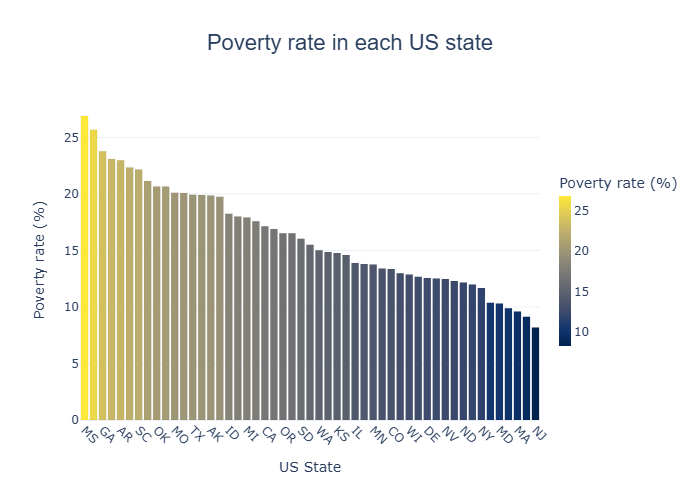

In [7]:
fig = px.bar(
    poverty_rate_by_state, 
    x='Geographic Area', 
    y='poverty_rate', 
    color='poverty_rate',
    color_continuous_scale='Cividis', 
    template='plotly_white',
    title='Poverty rate in each US state'
)

fig.update_coloraxes(
    colorbar=dict(
        title='Poverty rate',
        thickness=12,
        len=0.6,
        tickfont=dict(size=12),
        outlinewidth=0
    )
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='rgba(0,0,0,0.08)',
    hovertemplate=(
        '<b>State: %{x}</b><br>'
        'Poverty rate: %{y:.1f}%<br>'
        '<extra></extra>'
    ),
    showlegend=False
)

fig.update_layout(
    title=dict(x=0.5, font=dict(size=22, family='Arial')),
    xaxis_title='US State',
    xaxis=dict(tickangle=45),
    yaxis_title='Poverty rate (%)',
    width=None,
    coloraxis_colorbar=dict(title='Poverty rate (%)')

)

fig.show()

## 7. High School Graduation Rate by State

In [8]:
graduation_rate_by_state = (
    completed_hs_pct
    .assign(
        percent_completed_hs = lambda df: (
            df['percent_completed_hs']
            .replace('-', np.nan)
            .pipe(pd.to_numeric, errors='coerce')
        )
    )
    .groupby('Geographic Area', as_index=False)
    .agg(graduation_rate=('percent_completed_hs','mean'))
    .sort_values('graduation_rate', ascending=False)
)

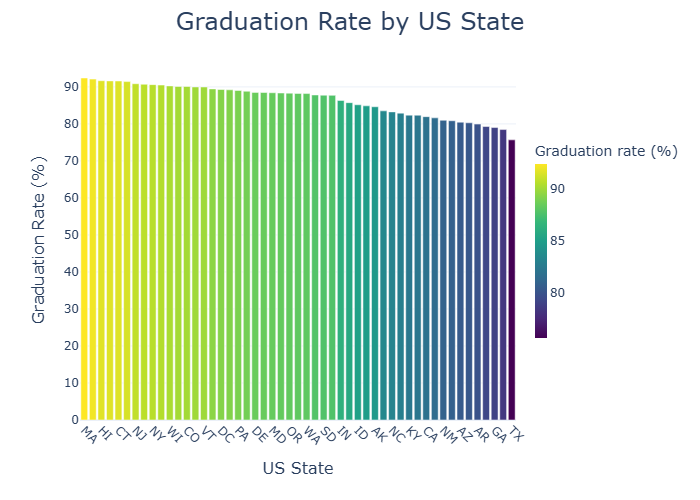

In [9]:
fig = px.bar(
    graduation_rate_by_state,
    x='Geographic Area',
    y='graduation_rate',
    color='graduation_rate',
    color_continuous_scale='Viridis'
)

fig.update_traces(
    hovertemplate=(
        '<b>State: %{x}</b><br>'
        '<b>Graduation rate: %{y:.1f}%</b><br>'
        '<extra></extra>'
    )
)

fig.update_layout(
    title=dict(
        text='Graduation Rate by US State',
        x=0.5,
        font=dict(size=24)
    ),
    template='plotly_white',
    xaxis=dict(
        title='US State',
        title_font=dict(size=16),
        tickfont=dict(size=12),
        tickangle=45,
        showgrid=False
    ),
    yaxis=dict(
        title='Graduation Rate (%)',
        title_font=dict(size=16),
        showgrid=True
    ),
    coloraxis_colorbar=dict(
        title='Graduation rate (%)',
        thickness=12,
        len=0.6
    )
)

fig.show()

## 8. Poverty vs Graduation 

In [10]:
state_poverty_and_graduation = (
    poverty_rate_by_state
    .merge(graduation_rate_by_state, on='Geographic Area')
)

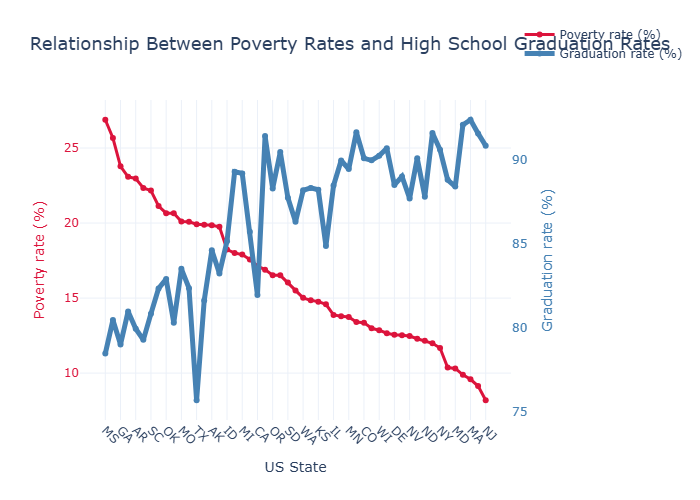

In [11]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=state_poverty_and_graduation['Geographic Area'],
        y=state_poverty_and_graduation['poverty_rate'],
        name='Poverty rate (%)',
        mode='lines+markers',
        line=dict(color='crimson', width=3),
        hovertemplate=(
            '<b>State: %{x}</b><br>'
            '<b>Poverty rate: %{y:.1f}%</br><br>'
            '<extra></extra>'
        ),
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=state_poverty_and_graduation['Geographic Area'],
        y=state_poverty_and_graduation['graduation_rate'],
        name='Graduation rate (%)',
        mode='lines+markers',
        line=dict(color='steelblue', width=5), 
        hovertemplate=(
            '<b>State: %{x}</b><br>'
            '<b>Graduation rate: %{y:.1f}%</b><br>'
            '<extra></extra>'
        ),
        yaxis='y2'
    )
)

fig.update_layout(
    title=dict(
        text='Relationship Between Poverty Rates and High School Graduation Rates',
        x=0.5,
        font=dict(size=18)
    ),
    xaxis=dict(
        title='US State',
        tickangle=45
    ),
    yaxis=dict(
        title='Poverty rate (%)',
        color='crimson',
        showgrid=True
        
    ),
    yaxis2=dict(
        title='Graduation rate (%)',
        overlaying='y',
        side='right',
        color='steelblue',
        showgrid=False
    ),
    legend=dict(
        orientation='v',
        y=1.25
    ),
    template='plotly_white',
)

## 9. Poverty vs Graduation - Seaborn jointplot (KDE)

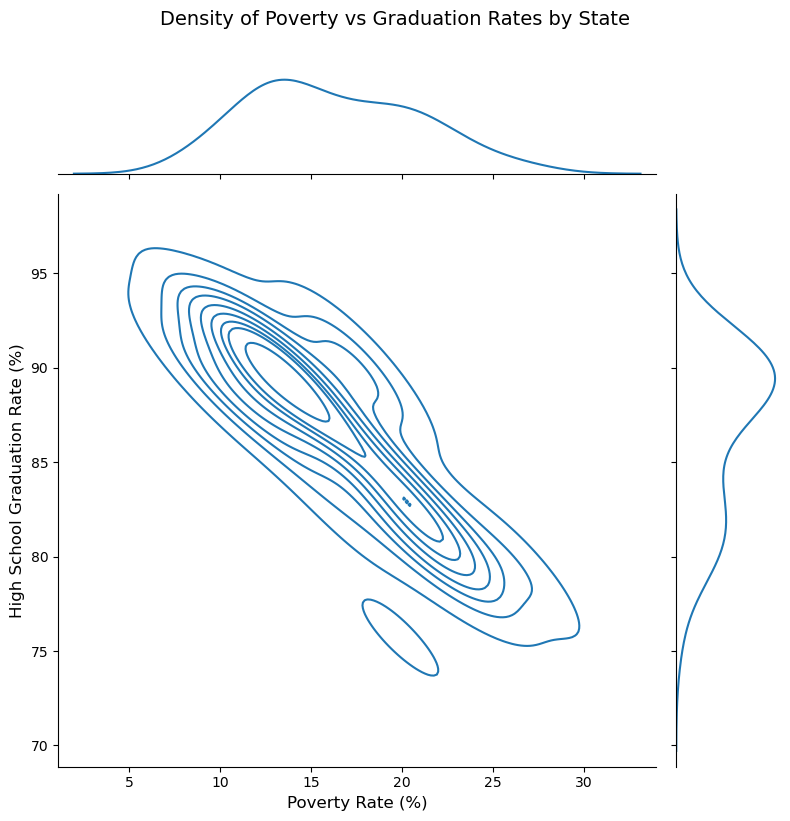

In [12]:
sns.jointplot(
    data=state_poverty_and_graduation,
    x='poverty_rate',
    y='graduation_rate',
    kind='kde',
    height=8,
    space=0
)

plt.xlabel('Poverty Rate (%)', fontsize=12)
plt.ylabel('High School Graduation Rate (%)', fontsize=12)
plt.suptitle('Density of Poverty vs Graduation Rates by State', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 10. Poverty vs Graduation — Linear regression (lmplot)

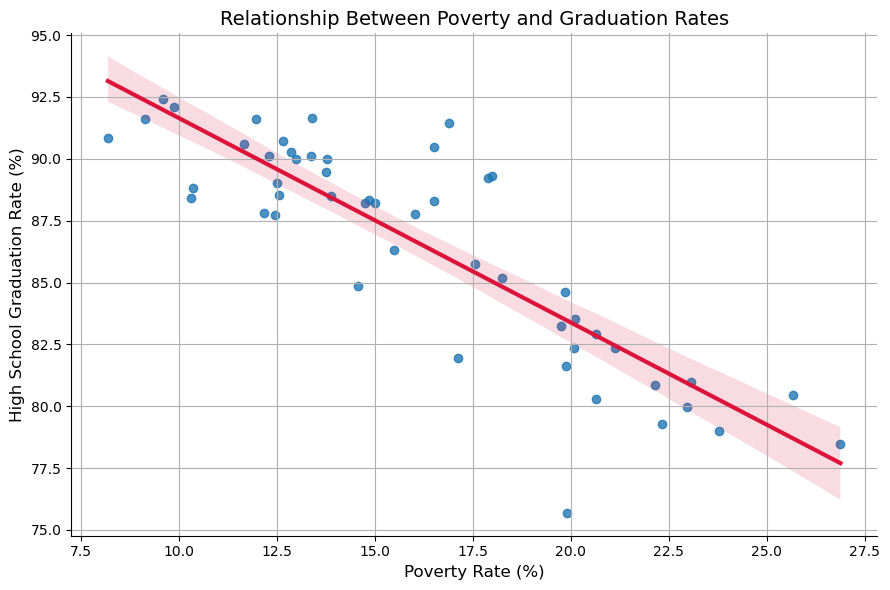

In [13]:
sns.lmplot(
    data=state_poverty_and_graduation,
    x='poverty_rate',
    y='graduation_rate',
    line_kws={'color':'crimson', 'linewidth':3},
    height=6,
    aspect=1.5
)

plt.xlabel('Poverty Rate (%)', fontsize=12)
plt.ylabel('High School Graduation Rate (%)', fontsize=12)
plt.title('Relationship Between Poverty and Graduation Rates', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## 11. Racial composition by State

In [14]:
sum_columns = [
    'share_white',
    'share_black',
    'share_native_american',
    'share_asian',
    'share_hispanic'
]

df_grouped_race = (
    share_race_city
    .groupby('Geographic area', as_index=False)[sum_columns]
    .sum()
)

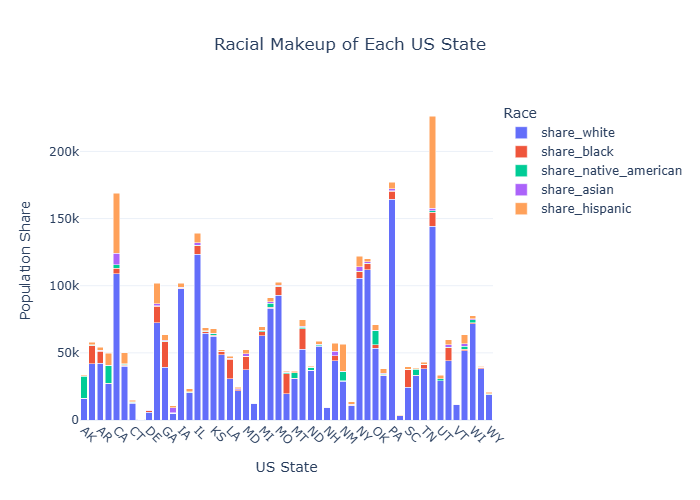

In [15]:
fig = px.bar(
    df_grouped_race, 
    x='Geographic area',
    y=sum_columns,
    title='Racial Makeup of Each US State'
)

fig.update_traces(
    textposition='outside',
    hovertemplate=(
        '<b>State: %{x}</b><br>'
        '<<b>Population: %{y:.0f}k</b><br>'
        '<extra></extra>'
    )

)

fig.update_layout(
    template='plotly_white',
    barmode='stack',
    xaxis=dict(tickangle=45, title='US State'),
    yaxis=dict(title='Population Share'),
    title=dict(x=0.5),
    legend=dict(title='Race')
)

fig.show()

## 12. Deaths by Race — Donut chart

In [16]:
df_death_stats = fatalities_data.value_counts('race')
race_labels = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'O': 'Other',
    'Unknown': 'Unknown'
}

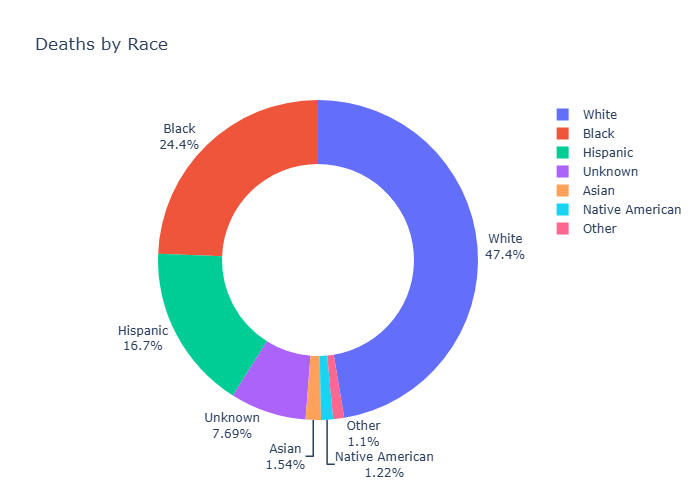

In [17]:
fig = px.pie(
    names=[race_labels[r] for r in df_death_stats.index],
    values=df_death_stats.values, 
    title='Deaths by Race',
    labels=df_death_stats.index,
    hole=0.6
)

fig.update_traces(
    textposition='outside', 
    textinfo='percent+label'
)

fig.show()

## 13. Deaths by Gender

In [18]:
df_gender_grouped = (
    fatalities_data
    .groupby('gender', as_index=False)
    .agg(deaths=('id','sum'))
    .sort_values('deaths', ascending=False)
)

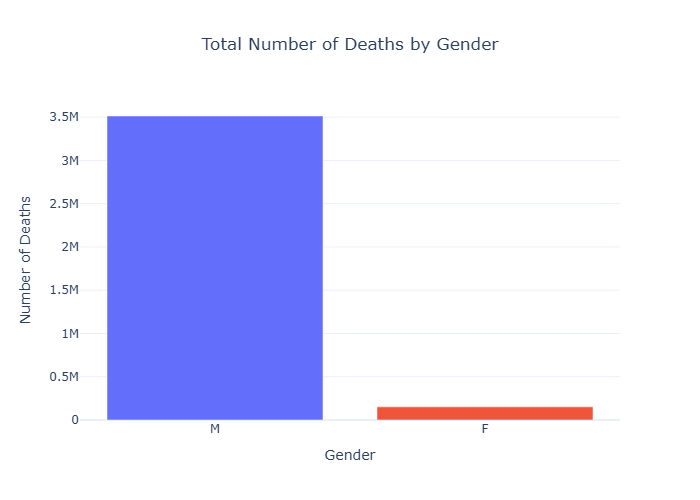

In [19]:
fig = px.bar(
    df_gender_grouped, 
    x='gender',
    y='deaths',
    color='gender',
    title='Total Number of Deaths by Gender',
    template='plotly_white'
)

fig.update_traces(
    textposition='outside',
    hovertemplate= (
        '<b>Gender: %{x}</b><br>'
        '<b>Total deaths:</b> %{y}</b><br>'
        '<extra></extra>'
    )
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Deaths',
    showlegend=False,
    title_x=0.5
)

fig.show()

## 14. Manner of Death by Age

In [20]:
df_manner_age = (
    fatalities_data
    .groupby(['age','manner_of_death'], as_index=False)
    .agg(deaths=('id','count'))
    .assign(age= lambda df: pd.to_numeric(df['age'], downcast='integer', errors='coerce'))
)


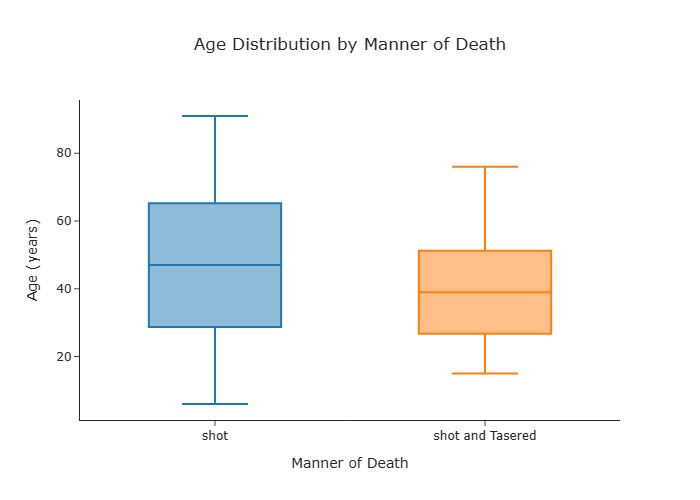

In [21]:
fig = px.box(
    df_manner_age,
    x='manner_of_death',
    y='age',
    color='manner_of_death',
    title='Age Distribution by Manner of Death',
    template='simple_white'
)

fig.update_layout(
    xaxis_title='Manner of Death',
    yaxis_title='Age (years)',
    showlegend=False,
    title_x=0.5,
    autosize=True
)

fig.show()

## 15. Weapons Carried by Deceased

In [22]:
carried_weapon_count = (
    fatalities_data
    .groupby('armed', as_index=False)
    .agg(weapon=('id','count'))
    .sort_values('weapon', ascending=False)
)

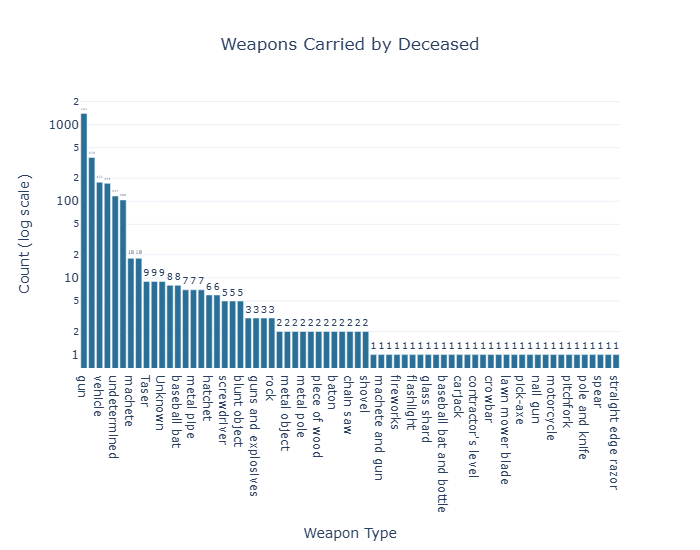

In [23]:
fig = px.bar(
    carried_weapon_count.sort_values('weapon', ascending=False),
    x='armed',
    y='weapon',
    title='Weapons Carried by Deceased',
    template='plotly_white'
)

fig.update_traces(
    text=carried_weapon_count['weapon'],
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Count: %{y}<extra></extra>',
    marker_color='#2a6f97'
)

fig.update_layout(
    xaxis_title='Weapon Type',
    yaxis_title='Count (log scale)',
    yaxis_type='log',
    showlegend=False,
    title_x=0.5,
    height=550
)

fig.show()

## 16. Age distribution — Histogram & KDE

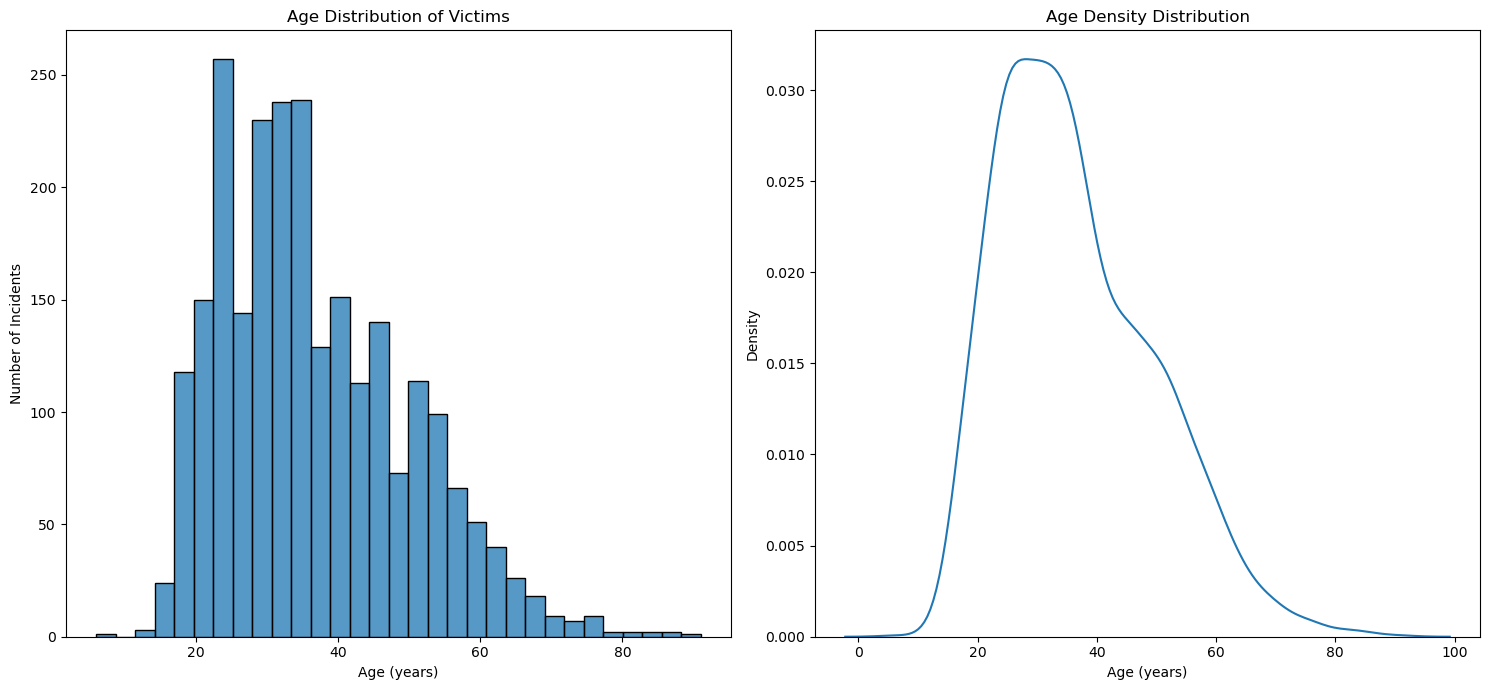

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15,7))

sns.histplot(fatalities_data, x='age', ax=axes[0])
axes[0].set_title('Age Distribution of Victims')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Number of Incidents')

sns.kdeplot(fatalities_data, x='age', ax=axes[1])
axes[1].set_title('Age Density Distribution')
axes[1].set_xlabel('Age (years)')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## 17. Age KDE by Race (multiple plots)

In [25]:
df_races_ages = (
    fatalities_data
    .groupby(['age','race'], as_index=False)
    .agg({'id':'count'})
)

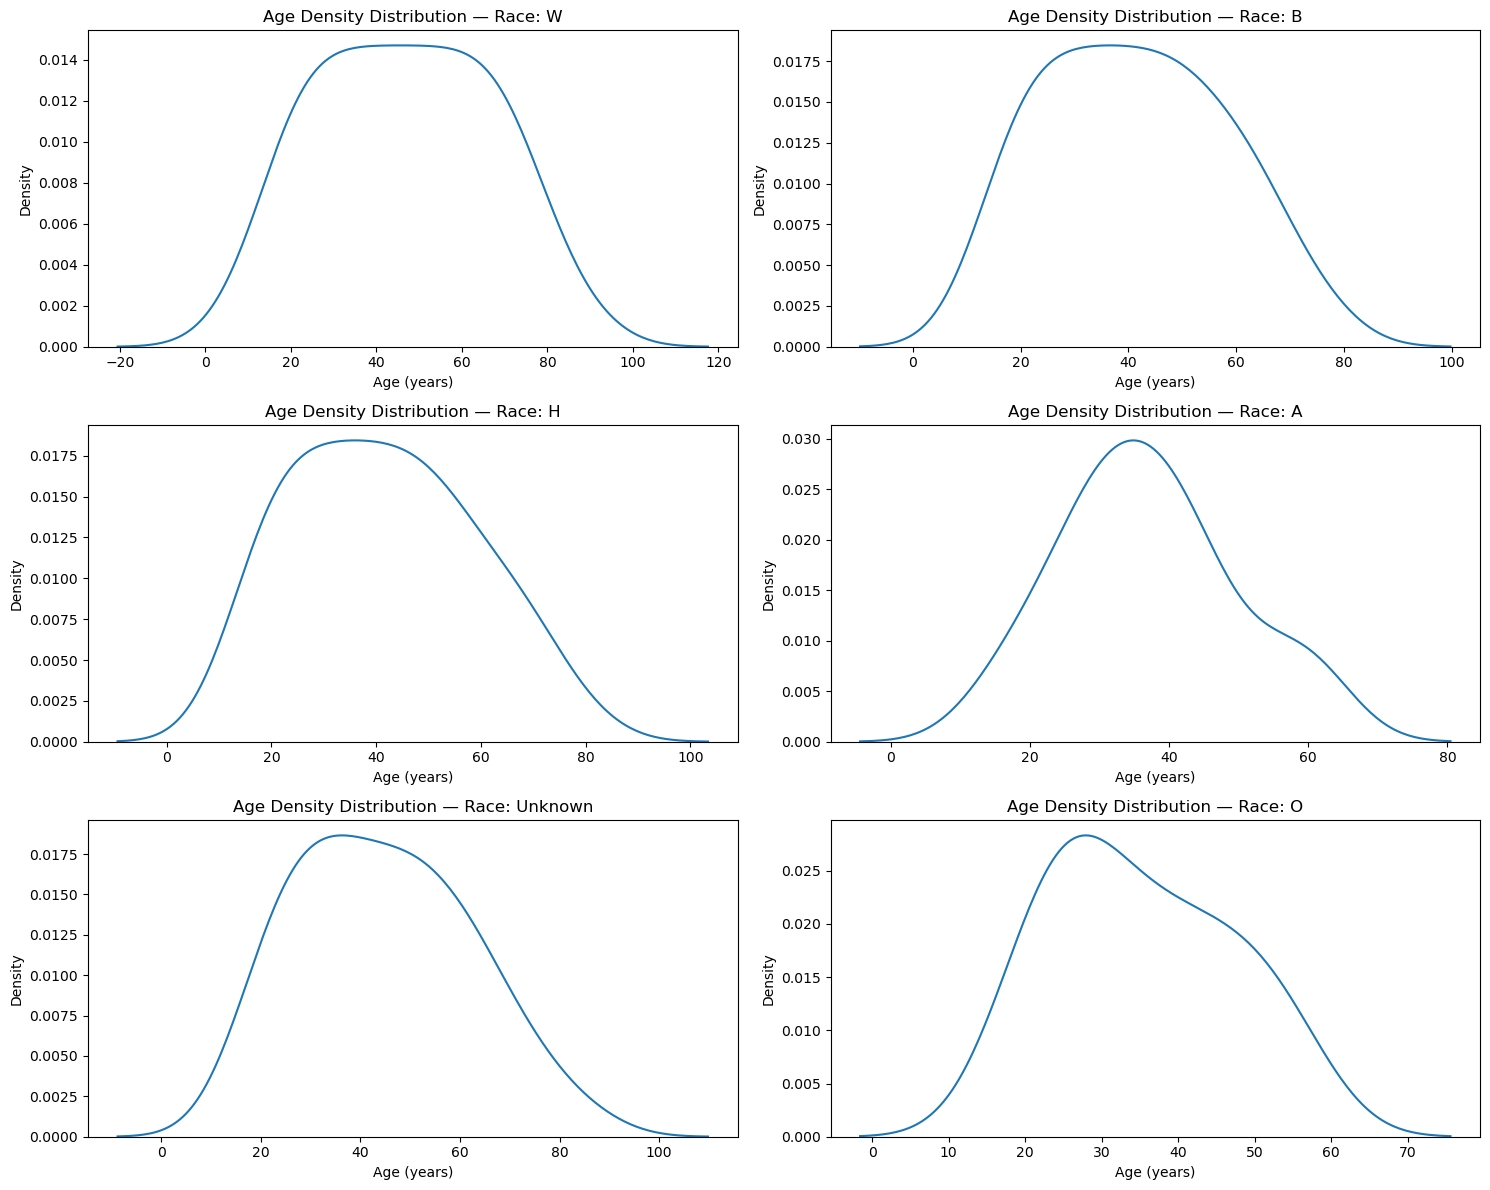

In [26]:
fig, axes = plt.subplots(3, 2, figsize=(15,12))

for race, ax in zip(df_races_ages['race'].unique(), axes.flatten()):
    sns.kdeplot(
        df_races_ages[df_races_ages['race'] == race],
        x='age',
        ax=ax
    )
    
    ax.set_title(f'Age Density Distribution — Race: {race}')
    ax.set_xlabel('Age (years)')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

## 18. Deaths by Race — Bar

In [27]:
races_death_count = (
    fatalities_data
    .groupby('race', as_index=False)
    .agg(deaths=('id','count'))
    .sort_values('deaths', ascending=False)
)

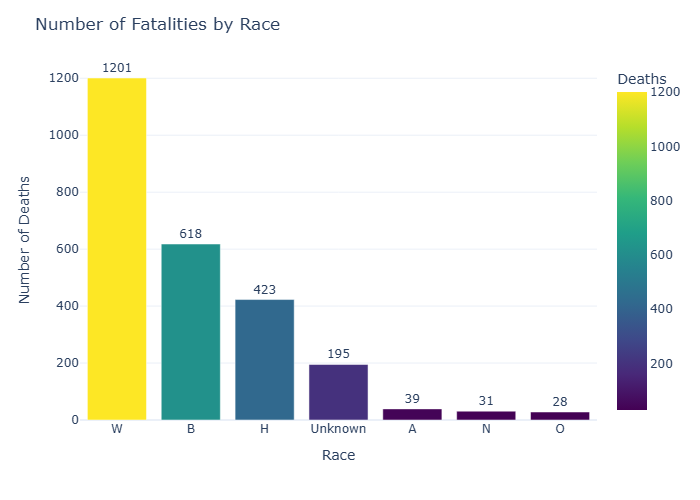

In [28]:
fig = px.bar(
    races_death_count,
    x='race',
    y='deaths',
    template='plotly_white',
    color='deaths',
    color_continuous_scale='Viridis'
)

fig.update_traces(
    text=races_death_count['deaths'],
    textposition='outside',
    cliponaxis=False
)

fig.update_layout(
    title='Number of Fatalities by Race',
    xaxis_title='Race',
    yaxis_title='Number of Deaths',
    coloraxis_colorbar_title='Deaths',
    showlegend=False,
)

fig.show()

## 19. Mental illness and police killings — Bar

In [29]:
df_mental_illness = (
    fatalities_data
    .groupby('signs_of_mental_illness', as_index=False)
    .agg(deaths=('id','count'))
)

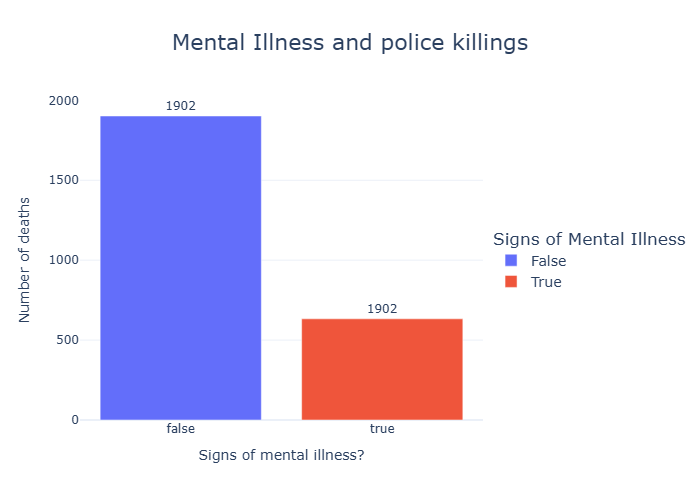

In [30]:
fig = px.bar(
    df_mental_illness, 
    x='signs_of_mental_illness', 
    y='deaths', 
    color='signs_of_mental_illness',
    title='Mental Illness and police killings'
)

fig.update_traces(
    hovertemplate='<b>Signs of mental illness: %{x}</b><br>' +
                  '<b>Deaths: %{y}</b><extra></extra>',
    text=df_mental_illness['deaths'],
    textposition='outside',
    cliponaxis=False
)

fig.update_layout(
    xaxis_title='Signs of mental illness?',
    yaxis_title='Number of deaths',
    legend=dict(
        title='Signs of Mental Illness',
        xanchor='left',
        y=0.5,
        font=dict(size=14)
    ),
    title=dict(font=dict(size=22), x=0.5),
    template='plotly_white'
)

fig.show()

## 20. Top 10 cities by police killings — Bar

In [31]:
df_cities_killings = (
    fatalities_data
    .groupby('city', as_index=False)
    .agg(killings=('id','count'))
    .sort_values('killings', ascending=False)
    .head(10)
)

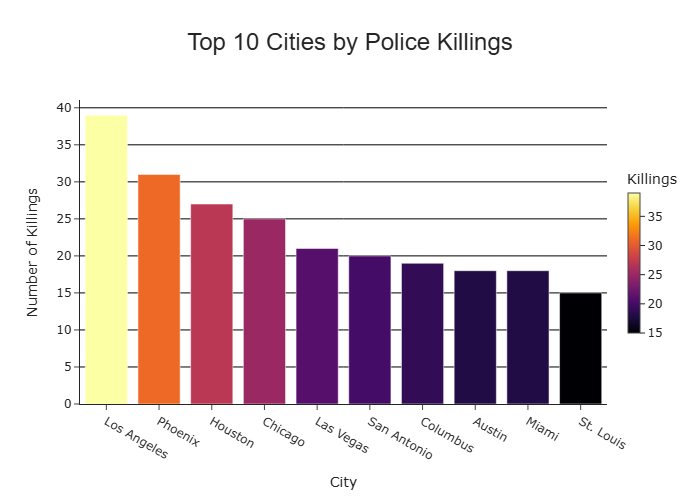

In [32]:
fig = px.bar(
    df_cities_killings,
    x='city',
    y='killings',
    color='killings',
    color_continuous_scale='Inferno',
    title='Top 10 Cities by Police Killings'
)

fig.update_traces(
    hovertemplate='<b>City: %{x}</b><br>'
                  '<b>Killings: %{y}</b>'
                  '<extra></extra>'                 
)

fig.update_layout(
    template='simple_white',
    xaxis_title='City',
    yaxis=dict(
        showgrid=True,
        gridcolor='black'
    ),
    yaxis_title='Number of Killings',
    title=dict(x=0.5, font=dict(size=24, family='Arial')),
    coloraxis_colorbar=dict(
        title='Killings',
        thickness=12,
        len=0.6,
        bgcolor='rgba(0,0,0,0)',
        tickfont=dict(size=12)
    )
)

fig.show()

## 21. Rate of deaths by race in top cities

In [33]:
df_race_killings = (
    fatalities_data
    .groupby(['race','city'], as_index=False)
    .agg(race_killings=('id','count'))  
)

df_cities_race_killing_ratio = (
    df_race_killings[df_race_killings['city'].isin(df_cities_killings['city'])]
    .merge(df_cities_killings, on='city')
    .assign(race_ratio = lambda df: df['race_killings']/df['killings'])
)

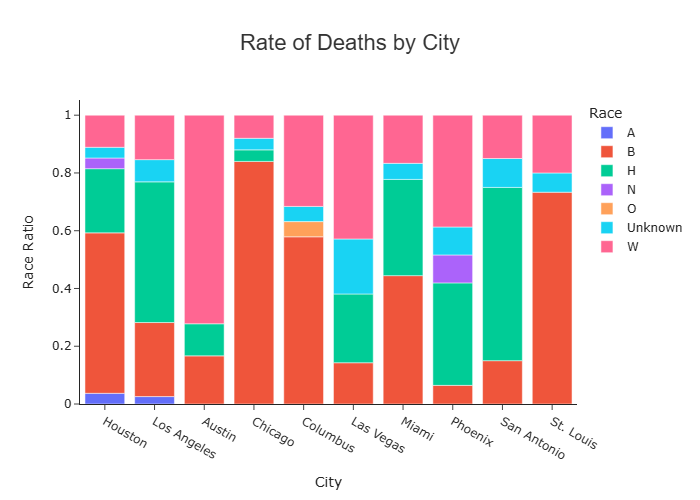

In [34]:
fig = px.bar(
    df_cities_race_killing_ratio,
    x='city',
    y='race_ratio',
    color='race',
    title='Rate of Deaths by City',
    hover_data={'race':True}
)

fig.update_traces(
    hovertemplate= (  
        '<b>Race: %{customdata[0]}<b><br>' +
        '<b>City: %{x}<b><br>' +
        '<b>Rate of Death: %{y:.2f}</b><extra></extra>'
    )
)

fig.update_layout(
    xaxis_title='City',
    yaxis_title='Race Ratio',
    template='simple_white',
    title=dict(x=0.5, font=dict(size=22, family='Arial', color='#333')),
    legend_title=dict(text='Race', font=dict(size=14))
)

fig.show()

## 22. Police killings by state

In [35]:
df_states = (
    fatalities_data
    .groupby('state', as_index=False)
    .agg(killings=('id','count'))
)

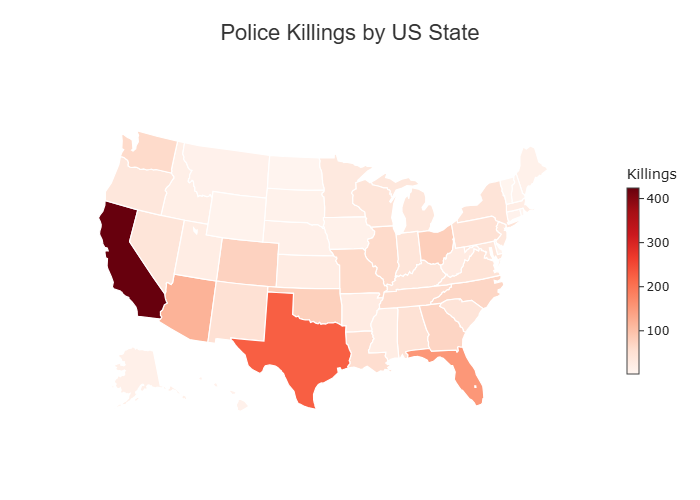

In [36]:
fig = px.choropleth(
    df_states,        
    locations='state',
    locationmode='USA-states',
    color='killings',
    color_continuous_scale='Reds',
    scope='usa',
    title='Police Killings by US State'
)

fig.update_traces(
    marker_line_color='white',
    marker_line_width=1.2,
    hovertemplate='<b>%{location}</b><br>' +
                  'Killings: <b>%{z}</b><extra></extra>'
)

fig.update_layout(
    template='simple_white',
    title=dict(x=0.5, font=dict(size=22, family='Arial', color='#333')),
    coloraxis_colorbar=dict(
        title='Killings',
        thickness=12,
        len=0.6,
        bgcolor='rgba(0,0,0,0)',
        tickfont=dict(size=12)
    ),
    margin=dict(l=40, r=40, t=80, b=40),
)

fig.show()

## 23. Time series — 30-day rolling average of killings

In [37]:
df_date = (
    fatalities_data
    .assign(date=lambda df: pd.to_datetime(df['date'], format='mixed'))
    .groupby('date', as_index=False)
    .agg(killings=('id','count'))
    .sort_values('date')
    .assign(rolling_30d=lambda df: df['killings'].rolling(window=30).mean())
)

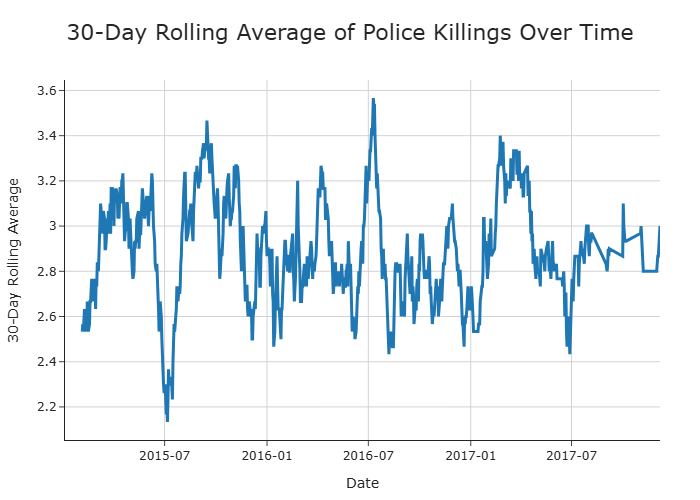

In [38]:
fig = px.line(
    df_date,
    x='date',
    y='rolling_30d',
    title='30-Day Rolling Average of Police Killings Over Time',
)

fig.update_traces(
    line=dict(color='#1f77b4', width=3),
    hovertemplate=(
        'Date: %{x}<br>' 
        'Deaths (30d avg): %{y:.2f}'
        '<extra></extra>'
    )
)

fig.update_layout(
    template='simple_white',
    title=dict(x=0.5, font=dict(size=22)),
    xaxis_title='Date',
    yaxis_title='30-Day Rolling Average',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgrey',
        tickformat='%Y-%m'
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    ),
    margin=dict(l=60, r=40, t=80, b=60),
    hovermode='x unified',
)

fig.show()

## 24. Conclusions

- **Geography** Deaths are concentrated mainly in the Southern and Southwestern states, with several cities in these regions ranking highest in total incidents.
- **Demographics** The vast majority of victims are males.
- **Circumstances:** Majority of incidents involve weapons, but some victims are recorded as unarmed.
- **Mental health:** Some of the incidents involve people who showed signs of mental illness.
- **Socio-economic context** States with higher poverty rates tend to have lower high school graduation rates.